# Table of contents

**1. Installation & setup**
   - Install bombcell package
   - Import libraries and set up paths
   - Configure parameters for both quality metrics and ephys properties

**2. Quality metrics analysis**
   - Run bombcell quality control pipeline
   - Classify units (good/MUA/noise/non-somatic)
   - Explore quality metrics results
   - Use interactive GUI for manual validation
   - Fine-tune classification parameters

**3. Ephys properties & cell classification** 
   - Compute electrophysiological properties (firing patterns, waveform features, etc.)
   - Classify cell types (cortical: pyramidal/interneurons, striatal: MSN/FSI/UIN)
   - Generate classification plots and results

---

In [1]:
# print out the timestamps when I run the following code
from datetime import datetime
print(f"[{datetime.now().strftime('%Y-%m-%d %H:%M:%S.%f')[:-3]}] Code execution completed")

import os, sys
from pathlib import Path
from pprint import pprint 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

[2026-01-25 18:39:40.407] Code execution completed


# 1. Installation & setup

#### Install bombcell

To install the latest stable version:
```bash
conda create -n bombcell python=3.11
conda activate bombcell
pip install uv
uv pip install bombcell # you could do `pip install .`, but uv is much quicker!
```
To install the dev version (with the latest updates): 
```bash
conda create -n bombcell python=3.11
conda activate bombcell
git clone https://github.com/Julie-Fabre/bombcell.git
cd bombcell/pyBombCell
pip install uv
uv pip install -e .
```

#### Import libraries

In [2]:
# print out the timestamps when I run the following code
from datetime import datetime
print(f"[{datetime.now().strftime('%Y-%m-%d %H:%M:%S.%f')[:-3]}] Code execution completed")

import os, sys
from pathlib import Path
from pprint import pprint 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

[2026-01-25 18:39:44.660] Code execution completed


In [3]:
# print out the timestamps when I run the following code
from datetime import datetime
print(f"[{datetime.now().strftime('%Y-%m-%d %H:%M:%S.%f')[:-3]}] Code execution completed")

%load_ext autoreload
%autoreload 2

import bombcell as bc

[2026-01-25 18:39:44.694] Code execution completed
✅ ipywidgets available - interactive GUI ready


In [4]:
# print out the timestamps when I run the following code
from datetime import datetime
print(f"[{datetime.now().strftime('%Y-%m-%d %H:%M:%S.%f')[:-3]}] Code execution completed")

# Optional

# # Add bombcell to Python path if NOT installed with pip
# # If notebook is running in bombcell repo:
# demo_dir = Path(os.getcwd())
# pyBombCell_dir = demo_dir.parent
# # Else:
# # pyBombCell_dir = "path/to/bombcell/repository/root"
# sys.path.append(str(pyBombCell_dir))

[2026-01-25 18:39:54.926] Code execution completed


#### Define paths

In [5]:
# print out the timestamps when I run the following code
from datetime import datetime
print(f"[{datetime.now().strftime('%Y-%m-%d %H:%M:%S.%f')[:-3]}] Code execution completed")

# Replace with your kilosort directory
# ks_dir = "Y:\SGL_DATA_drive\wmm001_250705_rec_d12\catgt_wmm001_250705_rec_d12_g0\wmm001_250705_rec_d12_g0_imec0\imec0_ks4"
ks_dir = "Y:\SGL_DATA_drive\wmm001_250709_rec_d13\catgt_wmm001_250709_rec_d13_g0\wmm001_250709_rec_d13_g0_imec0\imec0_ks4"

# Set bombcell's output directory
save_path = Path(ks_dir) / "bombcell"

print(f"Using kilosort directory: {ks_dir}")

[2026-01-25 18:39:55.058] Code execution completed
Using kilosort directory: Y:\SGL_DATA_drive\wmm001_250709_rec_d13\catgt_wmm001_250709_rec_d13_g0\wmm001_250709_rec_d13_g0_imec0\imec0_ks4


# Section 1: Quality Metrics

In [6]:
# print out the timestamps when I run the following code
from datetime import datetime
print(f"[{datetime.now().strftime('%Y-%m-%d %H:%M:%S.%f')[:-3]}] Code execution completed")

## Provide raw and meta files
## Leave 'None' if no raw data. Ideally, your raw data is common-average-referenced and
# the channels are temporally aligned to each other (this can be done with CatGT)
raw_file_path =  None # "/home/jf5479/cup/Julie/from_Yunchang/20250411_4423_antibody_maze_C1/CatGT_out/catgt_20250411_4423_C1_g0/20250411_4423_C1_g0_imec0/20250411_4423_C1_g0_tcat.imec0.ap.bin" #None#"/home/julie/Dropbox/Example datatsets/JF093_2023-03-09_site1/site1/2023-03-09_JF093_g0_t0_bc_decompressed.imec0.ap.bin" # ks_dir
meta_file_path = None # "/home/jf5479/cup/Julie/from_Yunchang/20250411_4423_antibody_maze_C1/CatGT_out/catgt_20250411_4423_C1_g0/20250411_4423_C1_g0_imec0/20250411_4423_C1_g0_tcat.imec0.ap.meta" #None#"/home/julie/Dropbox/Example datatsets/JF093_2023-03-09_site1/site1/2023-03-09_JF093_g0_t0_bc_decompressed.imec0.ap.bin"None#"/home/julie/Dropbox/Example datatsets/JF093_2023-03-09_site1/site1/2023-03-09_JF093_g0_t0.imec0.ap.meta"
## Get default parameters - we will see later in the notebook how to assess and fine-tune these
param = bc.get_default_parameters(ks_dir, 
                                  raw_file=raw_file_path,
                                  meta_file=meta_file_path,
                                  kilosort_version=4)

print("Bombcell parameters:")
pprint(param)

[2026-01-25 18:39:55.184] Code execution completed
Bombcell parameters:
{'computeDistanceMetrics': False,
 'computeDrift': False,
 'computeSpatialDecay': True,
 'computeTimeChunks': False,
 'decompress_data': False,
 'deltaTimeChunk': 360,
 'detrendForUnitMatch': False,
 'detrendWaveform': True,
 'driftBinSize': 60,
 'duplicateSpikeWindow_s': 3.4e-05,
 'ephysKilosortPath': 'Y:\\SGL_DATA_drive\\wmm001_250709_rec_d13\\catgt_wmm001_250709_rec_d13_g0\\wmm001_250709_rec_d13_g0_imec0\\imec0_ks4',
 'ephys_meta_file': None,
 'ephys_sample_rate': 30000,
 'extractRaw': True,
 'gain_to_uV': None,
 'hillOrLlobetMethod': True,
 'isoDmin': 20,
 'lratioMax': 0.3,
 'maxDrift': 100,
 'maxMainPeakToTroughRatio_nonSomatic': 0.8,
 'maxNPeaks': 2,
 'maxNTroughs': 1,
 'maxPeak1ToPeak2Ratio_nonSomatic': 3,
 'maxPercSpikesMissing': 20,
 'maxRPVviolations': 0.1,
 'maxScndPeakToTroughRatio_noise': 0.8,
 'maxSpatialDecaySlopeExp': 0.1,
 'maxWvBaselineFraction': 0.3,
 'maxWvDuration': 1150,
 'minAmplitude': 40,
 

##### Optionally, customize parameters (more on this later, below)

In [7]:
# print out the timestamps when I run the following code
from datetime import datetime
print(f"[{datetime.now().strftime('%Y-%m-%d %H:%M:%S.%f')[:-3]}] Code execution completed")

# you might to change:

# 1. classification thresholds like: 
# param["maxRPVviolations"] = 0.1


#  2. or which quality metrics are computed (by default these are not): 
param["computeDistanceMetrics"] = 0
param["computeDrift"] = 0
param["splitGoodAndMua_NonSomatic"] = 0


#  3. how quality metricsa are calculated:
# a. how refractory period window is defined
param["tauR_valuesMin"]= 0.5 / 1000  # minumum refractory period time (s), usually 0.002 s
param["tauR_valuesMax"]= 5 / 1000  # maximum refractory period time (s)
param["tauR_valuesStep"]= 0.5 / 1000  # if tauR_valuesMin and tauR_valuesMax are different, bombcell 
# will calculate refractory period violations from param["tauR_valuesMin"] to param["tauR_valuesMax"] param["tauR_valuesStep"] 
# bins and determine the option window for each unit before calculating the violations. 
        # tauR_valuesStep
#  b. or whether the recording is split into time chunks to detemrine "good" time chunks: 
# param["computeTimeChunks"] = 0
# full list in the wiki or in the bc.get_default_parameters function

[2026-01-25 18:39:55.289] Code execution completed


[2026-01-25 18:39:55.391] Code execution completed
🚀 Starting BombCell quality metrics pipeline...
📁 Processing data from: Y:\SGL_DATA_drive\wmm001_250709_rec_d13\catgt_wmm001_250709_rec_d13_g0\wmm001_250709_rec_d13_g0_imec0\imec0_ks4
Results will be saved to: Y:\SGL_DATA_drive\wmm001_250709_rec_d13\catgt_wmm001_250709_rec_d13_g0\wmm001_250709_rec_d13_g0_imec0\imec0_ks4\bombcell

Loading ephys data...
Loaded ephys data: 575 units, 9,650,473 spikes

⚙️ Computing quality metrics for 575 units...
   (Progress bar will appear below)


Computing bombcell quality metrics:   0%|          | 0/575 units


Saving GUI visualization data...
GUI visualization data saved to: Y:\SGL_DATA_drive\wmm001_250709_rec_d13\catgt_wmm001_250709_rec_d13_g0\wmm001_250709_rec_d13_g0_imec0\imec0_ks4\bombcell\for_GUI\gui_data.pkl
   Generated spatial decay fits: 567/575 units
   Generated amplitude fits: 567/575 units

🏷️ Classifying units (good/MUA/noise/non-soma)...

Generating summary plots...


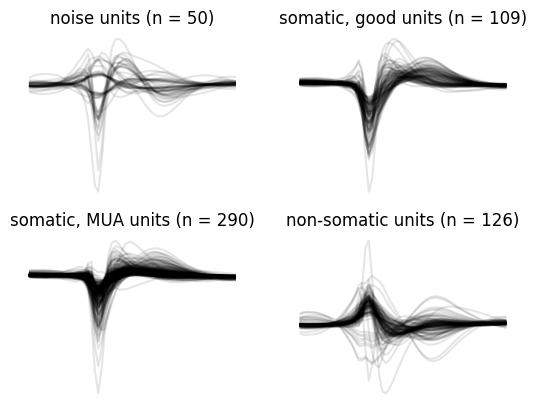

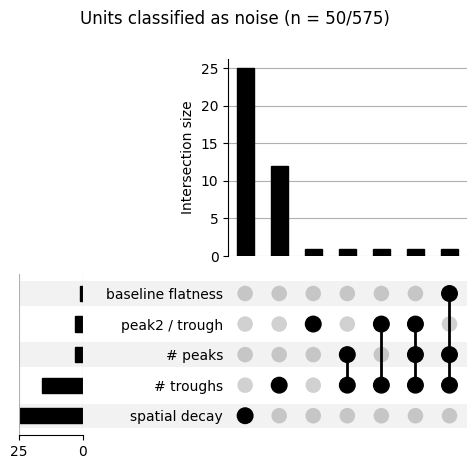

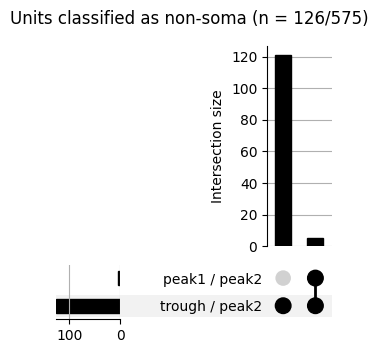

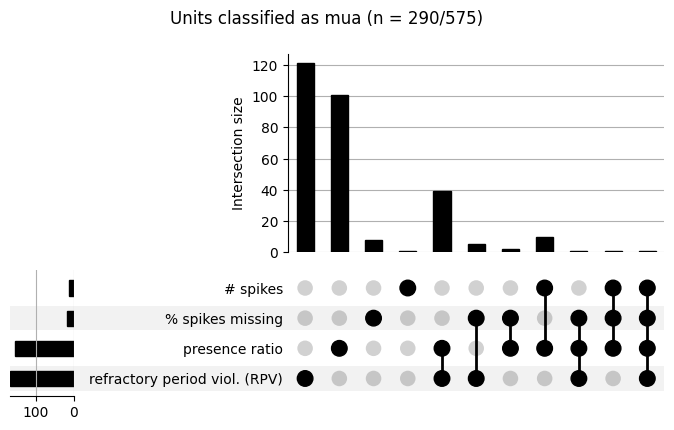

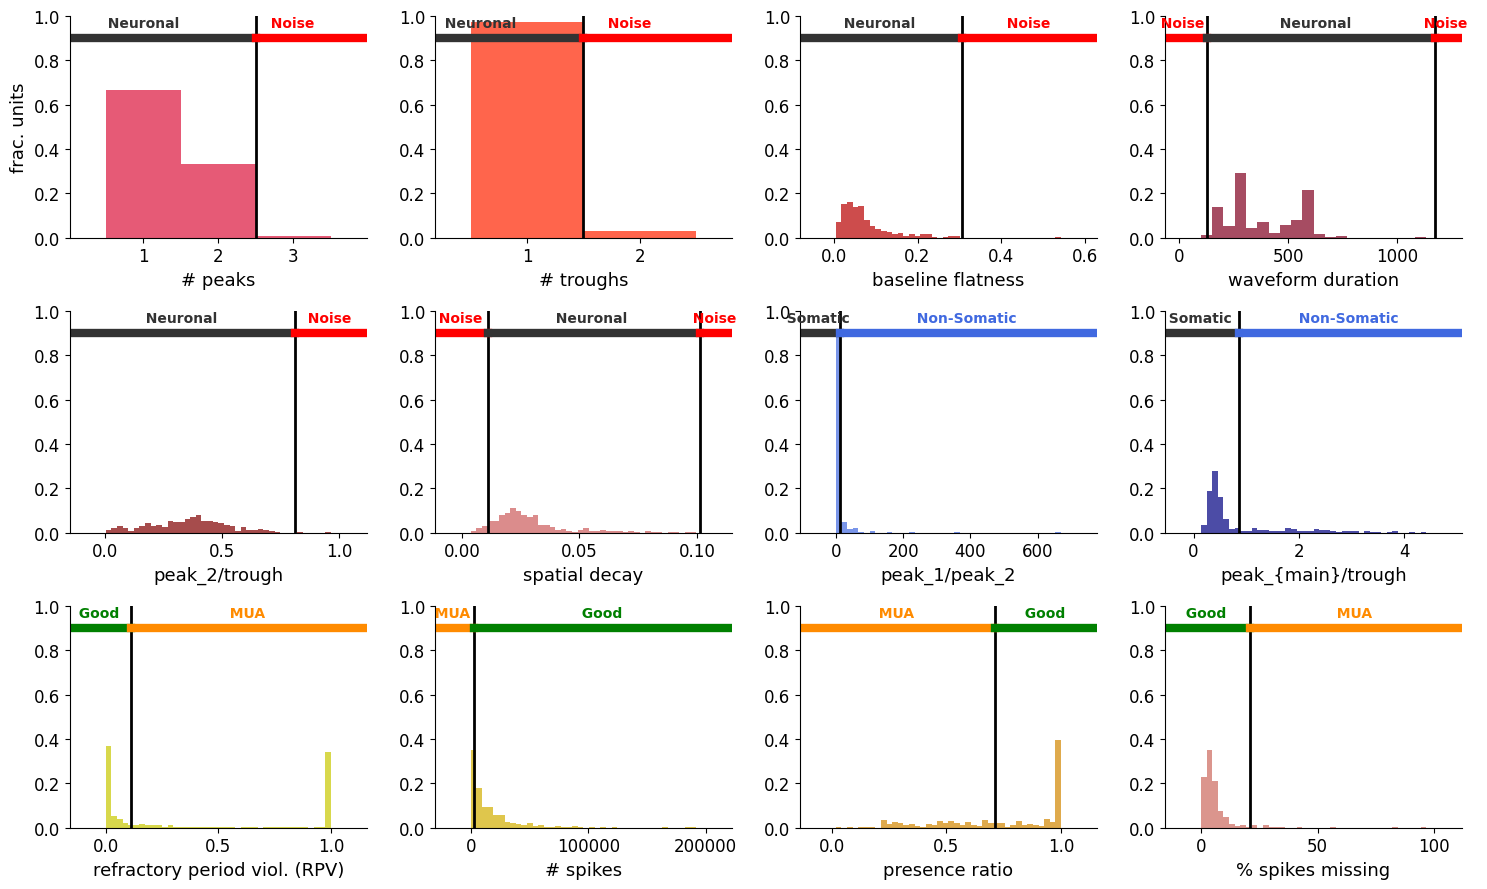


Saving results...
📁 Saving TSV files to Kilosort directory: Y:\SGL_DATA_drive\wmm001_250709_rec_d13\catgt_wmm001_250709_rec_d13_g0\wmm001_250709_rec_d13_g0_imec0\imec0_ks4
All expected metrics were successfully saved.


In [8]:
# print out the timestamps when I run the following code
from datetime import datetime
print(f"[{datetime.now().strftime('%Y-%m-%d %H:%M:%S.%f')[:-3]}] Code execution completed")

(
    quality_metrics,
    param,
    unit_type,
    unit_type_string,
) = bc.run_bombcell(
    ks_dir, save_path, param
)
# Use the output summary plots (below) to see if the 
# quality metric thresholds seem roughly OK for your 
# data (i.e. there isn't one threshold removing all 
# units or a threshold may below that removes none)
# more details on these output plots in the wiki:
# https://github.com/Julie-Fabre/bombcell/wiki/Summary-output-plots

##### How to access bombcell's saved quality metrics
Looking at all quality metric values per unit: 

In [9]:
# # print out the timestamps when I run the following code
# from datetime import datetime
# print(f"[{datetime.now().strftime('%Y-%m-%d %H:%M:%S.%f')[:-3]}] Code execution completed")

# # quality metric values
# quality_metrics_table = pd.DataFrame(quality_metrics)
# quality_metrics_table.insert(0, 'Bombcell_unit_type', unit_type_string)
# quality_metrics_table

In [10]:
# print out the timestamps when I run the following code
from datetime import datetime
print(f"[{datetime.now().strftime('%Y-%m-%d %H:%M:%S.%f')[:-3]}] Code execution completed")

# boolean table, if quality metrics pass threshold given parameters
boolean_quality_metrics_table = bc.make_qm_table(
    quality_metrics, param, unit_type_string
)
boolean_quality_metrics_table

[2026-01-25 18:42:27.273] Code execution completed


,unit_type,Original ID,# peaks,# troughs,waveform duration,baseline flatness,peak2 / trough,spatial decay,% spikes missing,presence ratio,# spikes,fraction RPVs,trough / peak2,peak1 / peak2
0,NOISE,0,False,False,False,False,False,True,False,False,False,False,False,False
1,NOISE,1,False,False,False,False,False,True,False,False,False,False,False,False
2,NOISE,2,False,False,False,False,False,True,False,False,False,False,False,False
3,NOISE,3,False,False,False,False,False,True,False,False,False,False,False,False
4,NOISE,4,False,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,MUA,573,False,False,False,False,False,False,False,True,False,True,False,False
571,NOISE,574,False,False,False,False,False,True,False,False,False,False,False,False
572,NOISE,575,False,False,False,False,False,True,False,False,False,False,False,False
573,NON-SOMA,576,False,False,False,False,False,False,False,False,False,False,True,False


Example: get all quality metrics for unit 12

In [11]:
# print out the timestamps when I run the following code
# from datetime import datetime
# print(f"[{datetime.now().strftime('%Y-%m-%d %H:%M:%S.%f')[:-3]}] Code execution completed")

# u = 12

# units = quality_metrics_table.phy_clusterID
# quality_metrics_table.loc[units == u, :]

#### Look at your data and bombcell's metrics in the minimal GUI

In [12]:
# print out the timestamps when I run the following code
from datetime import datetime
print(f"[{datetime.now().strftime('%Y-%m-%d %H:%M:%S.%f')[:-3]}] Code execution starts")

# Launch minimal GUI.
# Ideally, take a look at your units for a few datasets so you can get an idea of which 
# parameters will work best for your purposes. 
gui = bc.unit_quality_gui(
    ks_dir=ks_dir,
    quality_metrics=quality_metrics,
    unit_types=unit_type,
    param=param,
    save_path=save_path,
)

[2026-01-25 18:42:27.499] Code execution starts
Loaded GUI data from: Y:\SGL_DATA_drive\wmm001_250709_rec_d13\catgt_wmm001_250709_rec_d13_g0\wmm001_250709_rec_d13_g0_imec0\imec0_ks4\bombcell\for_GUI\gui_data.pkl
🚀 Auto-loaded GUI data from: Y:\SGL_DATA_drive\wmm001_250709_rec_d13\catgt_wmm001_250709_rec_d13_g0\wmm001_250709_rec_d13_g0_imec0\imec0_ks4\bombcell\for_GUI\gui_data.pkl
GUI data loaded successfully!
   Data types available: ['peak_locations', 'trough_locations', 'peak_loc_for_duration', 'trough_loc_for_duration', 'peak_trough_labels', 'duration_lines', 'spatial_decay_fits', 'amplitude_fits', 'channel_arrangements', 'waveform_scaling', 'acg_data', 'per_bin_metrics']
   Peak/trough detection: 567 units
   Spatial decay fits: 567 units
   Amplitude fits: 567 units
Total units: 575
📝 Initialized manual classification system (no previous classifications found)
🚀 Auto-advance enabled: will automatically go to next unit after classification


In [13]:
# print out the timestamps when I run the following code
from datetime import datetime
print(f"[{datetime.now().strftime('%Y-%m-%d %H:%M:%S.%f')[:-3]}] Code execution completed")

# Compare manual vs BombCell classifications (only requires save_path)
save_path = r'Y:\SGL_DATA_drive\wmm001_250705_rec_d12\catgt_wmm001_250705_rec_d12_g0\wmm001_250705_rec_d12_g0_imec0\imec0_ks4\bombcell'
bc.compare_manual_vs_bombcell(save_path)

[2026-01-25 18:43:10.855] Code execution completed
📊 Comparing manual vs BombCell classifications from: Y:\SGL_DATA_drive\wmm001_250705_rec_d12\catgt_wmm001_250705_rec_d12_g0\wmm001_250705_rec_d12_g0_imec0\imec0_ks4\bombcell
✅ Loaded BombCell results: 349 units
📂 Found manual classifications for 348 units
❌ Error: 'unit_id'
   Make sure you have run BombCell analysis first and saved results.


In [14]:
# Print out all the keys in the param dictionary

print("param keys:", list(param.keys()))

param keys: ['plotDetails', 'plotGlobal', 'savePlots', 'plotsSaveDir', 'verbose', 'reextractRaw', 'saveAsTSV', 'unit_type_for_phy', 'ephysKilosortPath', 'removeDuplicateSpikes', 'duplicateSpikeWindow_s', 'saveSpikes_withoutDuplicates', 'recomputeDuplicateSpikes', 'detrendWaveform', 'detrendForUnitMatch', 'nRawSpikesToExtract', 'decompress_data', 'extractRaw', 'probeType', 'tauR_valuesMin', 'tauR_valuesMax', 'tauR_valuesStep', 'tauC', 'hillOrLlobetMethod', 'computeTimeChunks', 'deltaTimeChunk', 'presenceRatioBinSize', 'driftBinSize', 'computeDrift', 'minThreshDetectPeaksTroughs', 'normalizeSpDecay', 'spDecayLinFit', 'computeSpatialDecay', 'ephys_sample_rate', 'nChannels', 'nSyncChannels', 'computeDistanceMetrics', 'nChannelsIsoDist', 'splitGoodAndMua_NonSomatic', 'maxNPeaks', 'maxNTroughs', 'minWvDuration', 'maxWvDuration', 'minSpatialDecaySlope', 'minSpatialDecaySlopeExp', 'maxSpatialDecaySlopeExp', 'maxWvBaselineFraction', 'maxScndPeakToTroughRatio_noise', 'minTroughToPeak2Ratio_nonSo

[2026-01-25 18:43:12.087] Code execution completed
Total overlapping clusters: 347


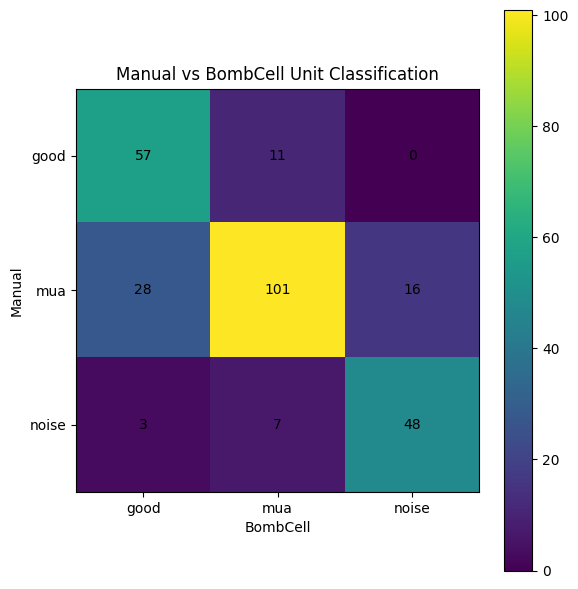


Overall agreement: 0.760

 good | precision: 0.648 | recall: 0.838
  mua | precision: 0.849 | recall: 0.697
noise | precision: 0.750 | recall: 0.828


In [15]:
# print out the timestamps when I run the following code
from datetime import datetime
print(f"[{datetime.now().strftime('%Y-%m-%d %H:%M:%S.%f')[:-3]}] Code execution completed")

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# Paths (EDIT THESE)
# -----------------------------
bc_path = r"Y:\SGL_DATA_drive\wmm001_250705_rec_d12\catgt_wmm001_250705_rec_d12_g0\wmm001_250705_rec_d12_g0_imec0\imec0_ks4\bombcell\cluster_bc_unitType.tsv"
manual_path = r"Y:\SGL_DATA_drive\wmm001_250705_rec_d12\catgt_wmm001_250705_rec_d12_g0\wmm001_250705_rec_d12_g0_imec0\imec0_ks4\bombcell\manual_unit_classifications.tsv"


# -----------------------------
# Load TSV files
# -----------------------------
bc = pd.read_csv(bc_path, sep="\t")
manual = pd.read_csv(manual_path, sep="\t")

# -----------------------------
# Rename columns if needed
# -----------------------------
bc = bc.rename(columns={
    "cluster_id": "cluster_id",
    "bc_unitType": "bombcell_label"
})

manual = manual.rename(columns={
    "cluster_id": "cluster_id",
    "manual_label": "group"
})

# -----------------------------
# Merge on cluster_id
# -----------------------------
df = pd.merge(bc, manual, on="cluster_id", how="inner")
print(f"Total overlapping clusters: {len(df)}")

# -----------------------------
# Normalize labels
# -----------------------------
def normalize_label(x):
    x = str(x).lower()
    if x in ["good", "single", "unit"]:
        return "good"
    if x in ["mua", "multi"]:
        return "mua"
    if x in ["noise", "bad"]:
        return "noise"
    return "other"

df["bombcell_label"] = df["bombcell_label"].apply(normalize_label)
df["manual_label"] = df["group"].apply(normalize_label)

labels = ["good", "mua", "noise"]
label_to_idx = {l: i for i, l in enumerate(labels)}

# -----------------------------
# Build confusion matrix manually
# -----------------------------
cm = np.zeros((len(labels), len(labels)), dtype=int)

for _, row in df.iterrows():
    m = row["manual_label"]
    b = row["bombcell_label"]
    if m in label_to_idx and b in label_to_idx:
        cm[label_to_idx[m], label_to_idx[b]] += 1

# -----------------------------
# Plot confusion matrix
# -----------------------------
fig, ax = plt.subplots(figsize=(6, 6))
im = ax.imshow(cm)

ax.set_xticks(range(len(labels)))
ax.set_yticks(range(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

ax.set_xlabel("BombCell")
ax.set_ylabel("Manual")
ax.set_title("Manual vs BombCell Unit Classification")

# Annotate counts
for i in range(len(labels)):
    for j in range(len(labels)):
        ax.text(j, i, cm[i, j], ha="center", va="center")

plt.colorbar(im, ax=ax)
plt.tight_layout()
plt.show()

# -----------------------------
# Agreement statistics
# -----------------------------
total = cm.sum()
correct = np.trace(cm)
accuracy = correct / total if total > 0 else np.nan

print(f"\nOverall agreement: {accuracy:.3f}\n")

# Per-class precision / recall
for i, label in enumerate(labels):
    tp = cm[i, i]
    fp = cm[:, i].sum() - tp
    fn = cm[i, :].sum() - tp

    precision = tp / (tp + fp) if (tp + fp) > 0 else np.nan
    recall = tp / (tp + fn) if (tp + fn) > 0 else np.nan

    print(f"{label:>5} | precision: {precision:.3f} | recall: {recall:.3f}")



In [16]:
# Find units that are labeled as 'GOOD' by bombcell but not labeled as 'GOOD' manually
# Note: This code should be run after cell 24 which loads and processes the data

# Filter for units where bombcell says GOOD but manual says something else
disagreement_good = df[(df["bombcell_label"] == "good") & (df["manual_label"] != "good")]

print("=" * 60)
print("Units labeled as 'GOOD' by BombCell but NOT 'GOOD' manually:")
print("=" * 60)
print(f"\nTotal count: {len(disagreement_good)} units\n")

if len(disagreement_good) > 0:
    # Show the cluster IDs and their labels
    result = disagreement_good[["cluster_id", "bombcell_label", "manual_label"]].copy()
    result = result.sort_values("cluster_id")
    
    print("Cluster ID | BombCell Label | Manual Label")
    print("-" * 50)
    for _, row in result.iterrows():
        print(f"    {row['cluster_id']:3d}    |      {row['bombcell_label']:8s}  |    {row['manual_label']:8s}")
    
    print(f"\n\nBreakdown by manual label:")
    print(disagreement_good["manual_label"].value_counts())
    
    # Save cluster IDs to a variable for further analysis
    good_bombcell_not_manual = disagreement_good["cluster_id"].values
    print(f"\n\nCluster IDs (saved to 'good_bombcell_not_manual'):")
    print(good_bombcell_not_manual)
else:
    print("No units found with this disagreement pattern.")
    good_bombcell_not_manual = np.array([])


Units labeled as 'GOOD' by BombCell but NOT 'GOOD' manually:

Total count: 37 units

Cluster ID | BombCell Label | Manual Label
--------------------------------------------------
      4    |      good      |    other   
      6    |      good      |    other   
      8    |      good      |    other   
      9    |      good      |    other   
     13    |      good      |    other   
     14    |      good      |    other   
     19    |      good      |    mua     
     27    |      good      |    mua     
     28    |      good      |    mua     
     33    |      good      |    mua     
     35    |      good      |    noise   
     37    |      good      |    mua     
     39    |      good      |    mua     
     40    |      good      |    mua     
     41    |      good      |    mua     
     42    |      good      |    mua     
     46    |      good      |    mua     
     57    |      good      |    mua     
     58    |      good      |    mua     
     61    |      good 

#### Fine-tune quality metric thresholds 
Based on bombcell's global output plots, looking through the GUI, your knowledge of neurons in your brain region and bombcell's suggestions above, you can adjust any of bombcell's quality metric thresholds and which quality metrics are computed.
For instance, if you are recording in the cerebellum and want to keep complex spikes, you might want to tweak waveform paramaters like max number of peaks and troughs to ensure you aren't classifying these units as noise. 

In [17]:
# print out the timestamps when I run the following code
from datetime import datetime
print(f"[{datetime.now().strftime('%Y-%m-%d %H:%M:%S.%f')[:-3]}] Code execution completed")

# Example: how to tweak a classification threshold and replot the summary plots 

# load previously computed quality metrics
param, quality_metrics, fractions_RPVs_all_taur = bc.load_bc_results(save_path)
# change parameter of interest 
param["maxNPeaks"] = 3 # for instance, it you more atypical waveform shapes in your region of interest
# get quality unit types
unit_type, unit_type_string = bc.qm.get_quality_unit_type(
        param, quality_metrics
    ) 
# load ephys data
(
    spike_times_samples,
    spike_clusters, # actually spike_templates, but they're the same in bombcell
    template_waveforms,
    template_amplitudes,
    pc_features,
    pc_features_idx,
    channel_positions,
) = bc.load_ephys_data(ks_dir)
# replot global output plots
bc.plot_summary_data(quality_metrics, template_waveforms, unit_type, unit_type_string, param)


[2026-01-25 18:43:12.610] Code execution completed


AttributeError: 'DataFrame' object has no attribute 'load_bc_results'

# Section 2: Ephys Properties & Cell Classification

In [ ]:
# print out the timestamps when I run the following code
from datetime import datetime
print(f"[{datetime.now().strftime('%Y-%m-%d %H:%M:%S.%f')[:-3]}] Code execution completed")

# Use the real dataset for ephys properties demonstration
# ks_dir = "toy_data"
save_path = Path(ks_dir) / "bombcell"

print(f"Using kilosort directory: {ks_dir}")

[2026-01-24 15:18:59.112] Code execution completed
Using kilosort directory: Y:\SGL_DATA_drive\wmm001_250705_rec_d12\catgt_wmm001_250705_rec_d12_g0\wmm001_250705_rec_d12_g0_imec0\imec0_ks4


In [ ]:
# print out the timestamps when I run the following code
from datetime import datetime
print(f"[{datetime.now().strftime('%Y-%m-%d %H:%M:%S.%f')[:-3]}] Code execution completed")

# Compute ephys properties for cell type classification
ephys_param = bc.get_ephys_parameters(ks_dir)

# Compute all ephys properties - now defaults to ks_dir/bombcell
ephys_properties, ephys_param = bc.run_all_ephys_properties(ks_dir, ephys_param, save_path=save_path)

[2026-01-24 15:19:02.239] Code execution completed


AttributeError: 'DataFrame' object has no attribute 'get_ephys_parameters'

In [ ]:
# print out the timestamps when I run the following code
from datetime import datetime
print(f"[{datetime.now().strftime('%Y-%m-%d %H:%M:%S.%f')[:-3]}] Code execution completed")

# Cell type classification with automatic plot generation
# Specify brain region: 'cortex' or 'striatum'
brain_region = 'striatum'  # Change this to 'cortex' for cortical data. Striatum and cortex are the only two options for now. 

print(f"Classifying {brain_region} neurons...")
cell_types = bc.classify_and_plot_brain_region(ephys_properties, ephys_param, brain_region)

[2026-01-24 15:19:07.025] Code execution completed
Classifying striatum neurons...


AttributeError: 'DataFrame' object has no attribute 'classify_and_plot_brain_region'

In [ ]:
# print out the timestamps when I run the following code
from datetime import datetime
print(f"[{datetime.now().strftime('%Y-%m-%d %H:%M:%S.%f')[:-3]}] Code execution completed")

# Show classification results
if cell_types is not None:
    # Create combined results table
    ephys_df = pd.DataFrame(ephys_properties)
    ephys_properties_table = ephys_df.copy()
    ephys_properties_table['cell_type'] = cell_types
   
    print(ephys_properties_table)

    unit_id  postSpikeSuppression  acg_tau_rise  acg_tau_decay    isi_cv  \
0         0              0.264976           3.0    3662.469531  4.265441   
1         1              2.790138           0.0      66.387905  4.797825   
2         2              0.562496           4.0            NaN  2.897528   
3         3              0.456108           1.0      11.905419  3.254744   
4         4              1.953192           0.0      57.631904  3.039968   
5         5              0.140160           4.0            NaN  5.296871   
6         6              0.009704          10.0            NaN  9.065419   
7         7              0.000000           2.0       3.966382  1.829375   
8         8              0.856894           3.0      53.264784  2.286946   
9         9                   NaN           NaN            NaN       NaN   
10       10              0.000000           1.0       4.479466  3.931697   
11       11              0.000000           8.0            NaN  3.275890   
12       12 